# Fourier Analysis

Apply fourier analysis to security prices to see if there is meaningful repeatable (periodic) patterns within the data.

## Initialization

In [1]:
# initialize the module and import all libraries
from init import *
from scipy.fftpack import fft, fftfreq

## Config

In [2]:
START_DATE = "2024-01-04"
END_DATE = "2024-01-05"
SYMBOL = "SPY"
INTERVAL = "1m"

## Data Collection and Preparation

In [3]:
prices_df = yf.download(
    tickers=SYMBOL, start=START_DATE, end=END_DATE, interval=INTERVAL
)[["Adj Close"]]
prices_df.columns = ["Prices"]
prices_df["Normalized"] = prices_df["Prices"] / prices_df["Prices"].iloc[0]
prices_df["Returns"] = (prices_df["Prices"] / prices_df["Prices"].shift(1)).fillna(1) - 1
prices_df["One"] = 1.0
prices_df["Zero"] = 0.0
prices_df.head()

[*********************100%%**********************]  1 of 1 completed


,Prices,Normalized,Returns,One,Zero
Datetime,,,,,
2024-01-04 09:30:00-05:00,468.450012,1.000000,0.000000,1.0,0.0
2024-01-04 09:31:00-05:00,468.670013,1.000470,0.000470,1.0,0.0
2024-01-04 09:32:00-05:00,469.059998,1.001302,0.000832,1.0,0.0
2024-01-04 09:33:00-05:00,468.730011,1.000598,-0.000704,1.0,0.0
2024-01-04 09:34:00-05:00,468.850006,1.000854,0.000256,1.0,0.0


## Research

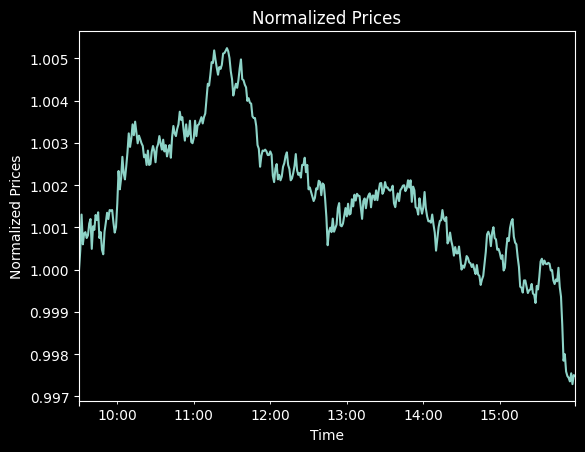

In [4]:
ax = prices_df["Normalized"].plot()
plt.title("Normalized Prices")
plt.xlabel("Time")
plt.ylabel("Normalized Prices")
plt.show()

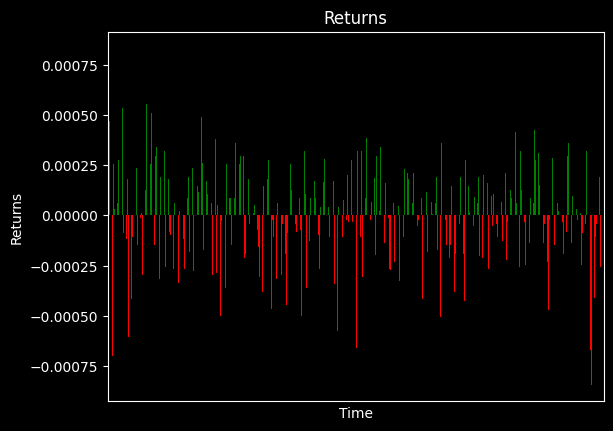

In [5]:
plot_returns(prices_df["Returns"])

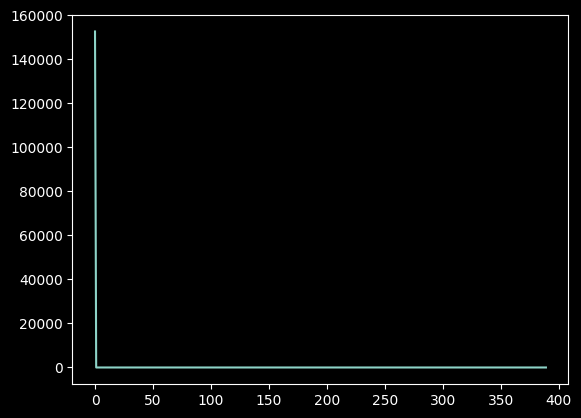

In [6]:
fft_result = np.abs(fft(prices_df["Normalized"].to_numpy())) ** 2
plt.plot(fft_result)

## Strategy

## Performance

## Testing